In [79]:
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
reload(a2)
from IPython.display import display, HTML

from flutype.utils import django_setup
from flutype.models import Spot, RawSpotCollection
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.cm as cm
import preprocessing as pre


In [80]:
reload(pre)
reload(a2)

<module 'analysis2' from '/home/janekg89/Develop/Pycharm_Projects/flutype_analysis_web/analysis2.py'>

In [86]:
studies = ["microarray_2018_03_21"]
viruses = ['A/Aichi/2/68(H3N2)-X31-2018-04-13','A/California/7/2009(H1N1)-2018-04-13','A/Hong Kong/4801/2014(H3N2)-2018-04-13','A/Brisbane/10/2007(H3N2)-2018-04-13','A/Brisbaine/59/2007(H1N1)-2018-04-13']
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_before = spots_dj.filter(spot_collection__sid = "before")
spots_quant = spots_dj.filter(spot_collection__sid = "quant1")


cs = ["2018_03_21_slide_31","2018_03_21_slide_69"]
spots_dj =  spots_quant.exclude(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(raw_spot__lig_mob_batch__sid__in = viruses)
#spots_dj = spots_dj.filter(circle_quality__gte = 0.35)

data = a2.Data(spots_dj=spots_dj).outlier_filtering()


In [87]:
#RawSpotCollection.objects.filter(lig_fix__ ="P079")

In [88]:
#spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
#spots_dj = spots_dj.exclude(spot_collection__sid = "raw")


In [89]:
#data = a2.Data(spots_dj=spots_dj)
data.spots_pd["Analyte Batch"].unique()

array(['A/Brisbane/10/2007(H3N2)-2018-04-13',
       'A/California/7/2009(H1N1)-2018-04-13',
       'A/Brisbaine/59/2007(H1N1)-2018-04-13',
       'A/Hong Kong/4801/2014(H3N2)-2018-04-13',
       'A/Aichi/2/68(H3N2)-X31-2018-04-13'], dtype=object)

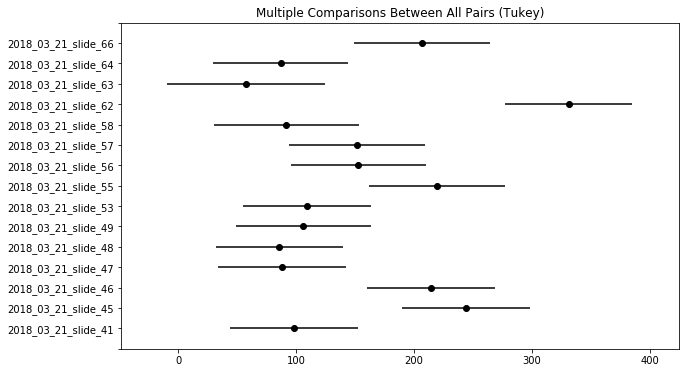

In [90]:
d_new = data.subset_ligand_batches(["P076"])
results = MultiComparison(d_new.spots_pd["Intensity"],d_new.spots_pd["Collection"]).tukeyhsd()
results.plot_simultaneous()
plt.show()

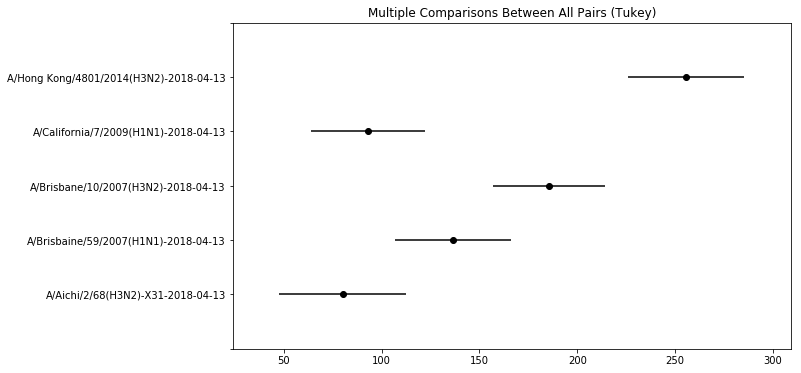

In [91]:
d_new = data.subset_ligand_batches(["P076"])
results = MultiComparison(d_new.spots_pd["Intensity"],d_new.spots_pd["Analyte Batch"]).tukeyhsd()
results.plot_simultaneous()
plt.show()

In [92]:
#pre.mean_on_(data.spots_pd).groupby("Collection").mean()
mean_collection = pre.mean_on_collection(data.spots_pd)


In [93]:
mean_on_ana = pre.mean_on_analyte_batch(data.spots_pd)


In [94]:
ma = mean_on_ana.groupby(["Analyte Batch"]).mean()["Intensity_rsd"]

In [95]:
#mc = mean_collection.groupby(["Analyte Batch"]).mean()["Intensity_rsd"]


In [96]:
#data.subset_ligand_batches["LF-0.0001","LF-0.001","LF-0.01","LF-0.05","LF-0.1","LF-0.5","Empty"]

In [97]:
mean_ligand_col = mean_collection.groupby(["Ligand Batch"]).mean()#.sort_values(by="Intensity")
mean_ligand_ana = mean_on_ana.groupby(["Ligand Batch"]).mean()#.sort_values(by="Intensity")

In [98]:
mean_ligand_col

,Ligand Batch Concentration,Analyte Batch Concentraion,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
Ligand Batch,,,,,,,,,,,,
Empty,NaN,1.297789,161.982113,265.904574,0.198618,28.152112,8.424560,49.283729,30.266667,12.954389,6.696809e+03,0.415486
LF-0.0001,0.0001,1.297789,143.145095,234.713583,0.306874,33.030026,7.728175,12.895238,8.200000,15.172225,3.023305e+03,0.279039
LF-0.001,1.0000,1.297789,269.836060,405.104615,0.361799,31.571693,6.681746,13.104762,8.266667,32.696560,1.469887e+04,0.335166
LF-0.01,0.0100,1.297789,209.642629,268.353774,0.549823,32.108333,8.925000,12.966667,8.600000,20.098872,3.977166e+03,0.278331
LF-0.05,0.0500,1.297789,285.725499,380.058513,0.536595,20.193624,7.392778,30.786579,20.000000,24.970080,1.583716e+04,0.390068
LF-0.1,0.1000,1.297789,273.244536,438.168589,0.548030,29.271027,7.892128,80.380467,51.866667,13.693200,1.122406e+04,0.356335
LF-0.5,0.5000,1.297789,294.321270,449.203585,0.510523,32.346693,8.460317,12.980556,8.200000,33.348682,1.526460e+04,0.298031
Nenad,1.0000,1.297789,2481.223589,4584.966821,0.484977,28.806746,6.309048,13.007540,8.133333,485.720772,4.892159e+06,0.525121
P007,1.0000,1.297789,160.018930,268.006344,0.381261,28.855159,6.830952,12.865873,8.200000,15.238913,2.844673e+03,0.258160


In [99]:
mean_ligand_ana

,Ligand Batch Concentration,Analyte Batch Concentraion,Intensity,Std,Circle Quality,Row,Column,Replica,Count,Intensity_std,Intensity_var,Intensity_rsd
Ligand Batch,,,,,,,,,,,,
Empty,NaN,1.297789,162.353082,266.935669,0.198096,28.144769,8.422340,49.197895,90.8,8.314740,7.503199e+03,0.470191
LF-0.0001,0.0001,1.297789,143.632907,235.850809,0.309012,32.994000,7.712615,13.115949,24.6,10.797457,3.348530e+03,0.367804
LF-0.001,1.0000,1.297789,270.296941,407.293847,0.359270,31.619105,6.682268,13.160720,24.8,22.663738,1.840170e+04,0.416702
LF-0.01,0.0100,1.297789,209.822244,269.148502,0.549495,32.088615,8.929846,13.043077,25.8,14.064652,5.292653e+03,0.342586
LF-0.05,0.0500,1.297789,286.116444,381.478924,0.537068,20.133901,7.393044,30.653834,60.0,16.308863,1.776921e+04,0.446007
LF-0.1,0.1000,1.297789,272.961641,437.735339,0.548236,29.259512,7.892313,80.316604,155.6,8.857777,1.335215e+04,0.401455
LF-0.5,0.5000,1.297789,299.775335,464.082404,0.511899,32.294000,8.486615,13.289487,24.6,25.831000,1.962107e+04,0.451434
Nenad,1.0000,1.297789,2618.281833,4761.476585,0.486686,28.698482,6.330383,12.942495,24.4,438.192778,1.103115e+07,0.721828
P007,1.0000,1.297789,162.988370,271.067867,0.379673,28.736754,6.840478,12.507522,24.6,12.199305,4.434759e+03,0.352111


In [100]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=mean_ligand_col["Intensity"],
    y=mean_ligand_col["Intensity_rsd"],
    #z=test_data[:,2],
    text = mean_ligand_col.index,
    mode='markers+text',
    hoverinfo='text',
    textposition='bottom',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        #color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)
trace2 = go.Scatter(
    x=mean_ligand_col["Intensity_rsd"],
    y=mean_ligand_ana["Intensity_rsd"]-mean_ligand_col["Intensity_rsd"],
    #z=test_data[:,2],
    text = mean_ligand_ana.index,
    hoverinfo='text',
    textposition='bottom',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color="r",                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')
#plt.scatter(mean_ligand["Intensity"],mean_ligand["Intensity_rsd"])
#plt.show()

2.6.0


In [101]:
mc

Analyte Batch
A/Aichi/2/68(H3N2)-X31-2018-04-13              0.323869
A/Beijing/32/1992(H3N2)-2018-04-13             0.485795
A/Brisbaine/59/2007(H1N1)-2018-04-13           0.398521
A/Brisbane/10/2007(H3N2)-2018-04-13            0.502372
A/California/7/2009(H1N1)-2018-04-13           0.452894
A/Hong Kong/4801/2014(H3N2)-2018-04-13         0.417610
A/Panama/2007/1999(H3N2)-2018-04-13            0.461282
A/Perth/16/2009(H3N2)-2018-04-13               0.440633
A/Switzerland/9715293/2013(H3N2)-2018-04-13    0.414055
A/Texas/50/2012(H3N2)-2018-04-13               0.442466
A/Victoria/361/2011(H3N2)-2018-04-13           0.372581
Mi45-2018-04-13                                0.394870
VicAlla-2018-04-13                             0.362486
Name: Intensity_rsd, dtype: float64

In [102]:
ma

Analyte Batch
A/Aichi/2/68(H3N2)-X31-2018-04-13         0.465208
A/Brisbaine/59/2007(H1N1)-2018-04-13      0.496861
A/Brisbane/10/2007(H3N2)-2018-04-13       0.638769
A/California/7/2009(H1N1)-2018-04-13      0.590385
A/Hong Kong/4801/2014(H3N2)-2018-04-13    0.556934
Name: Intensity_rsd, dtype: float64

In [103]:
#plt.scatter(mc["Intensity"],mc["Intensity_rsd"])
#plt.show()

In [104]:
1-mc/ma

Analyte Batch
A/Aichi/2/68(H3N2)-X31-2018-04-13              0.303818
A/Beijing/32/1992(H3N2)-2018-04-13                  NaN
A/Brisbaine/59/2007(H1N1)-2018-04-13           0.197923
A/Brisbane/10/2007(H3N2)-2018-04-13            0.213531
A/California/7/2009(H1N1)-2018-04-13           0.232883
A/Hong Kong/4801/2014(H3N2)-2018-04-13         0.250163
A/Panama/2007/1999(H3N2)-2018-04-13                 NaN
A/Perth/16/2009(H3N2)-2018-04-13                    NaN
A/Switzerland/9715293/2013(H3N2)-2018-04-13         NaN
A/Texas/50/2012(H3N2)-2018-04-13                    NaN
A/Victoria/361/2011(H3N2)-2018-04-13                NaN
Mi45-2018-04-13                                     NaN
VicAlla-2018-04-13                                  NaN
Name: Intensity_rsd, dtype: float64

In [105]:
df_new = data.subset_ligand_batches(["LF-0.0001","LF-0.001","LF-0.01","LF-0.05","LF-0.1","LF-0.5","Empty", "Nenad"])


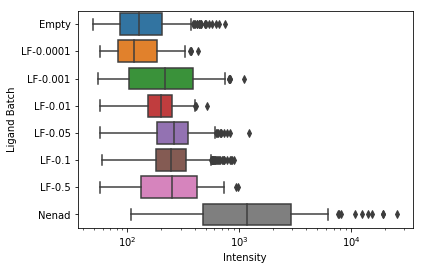

In [106]:
sns.boxplot(data=df_new.spots_pd, x="Intensity", y="Ligand Batch")
plt.xscale("log")

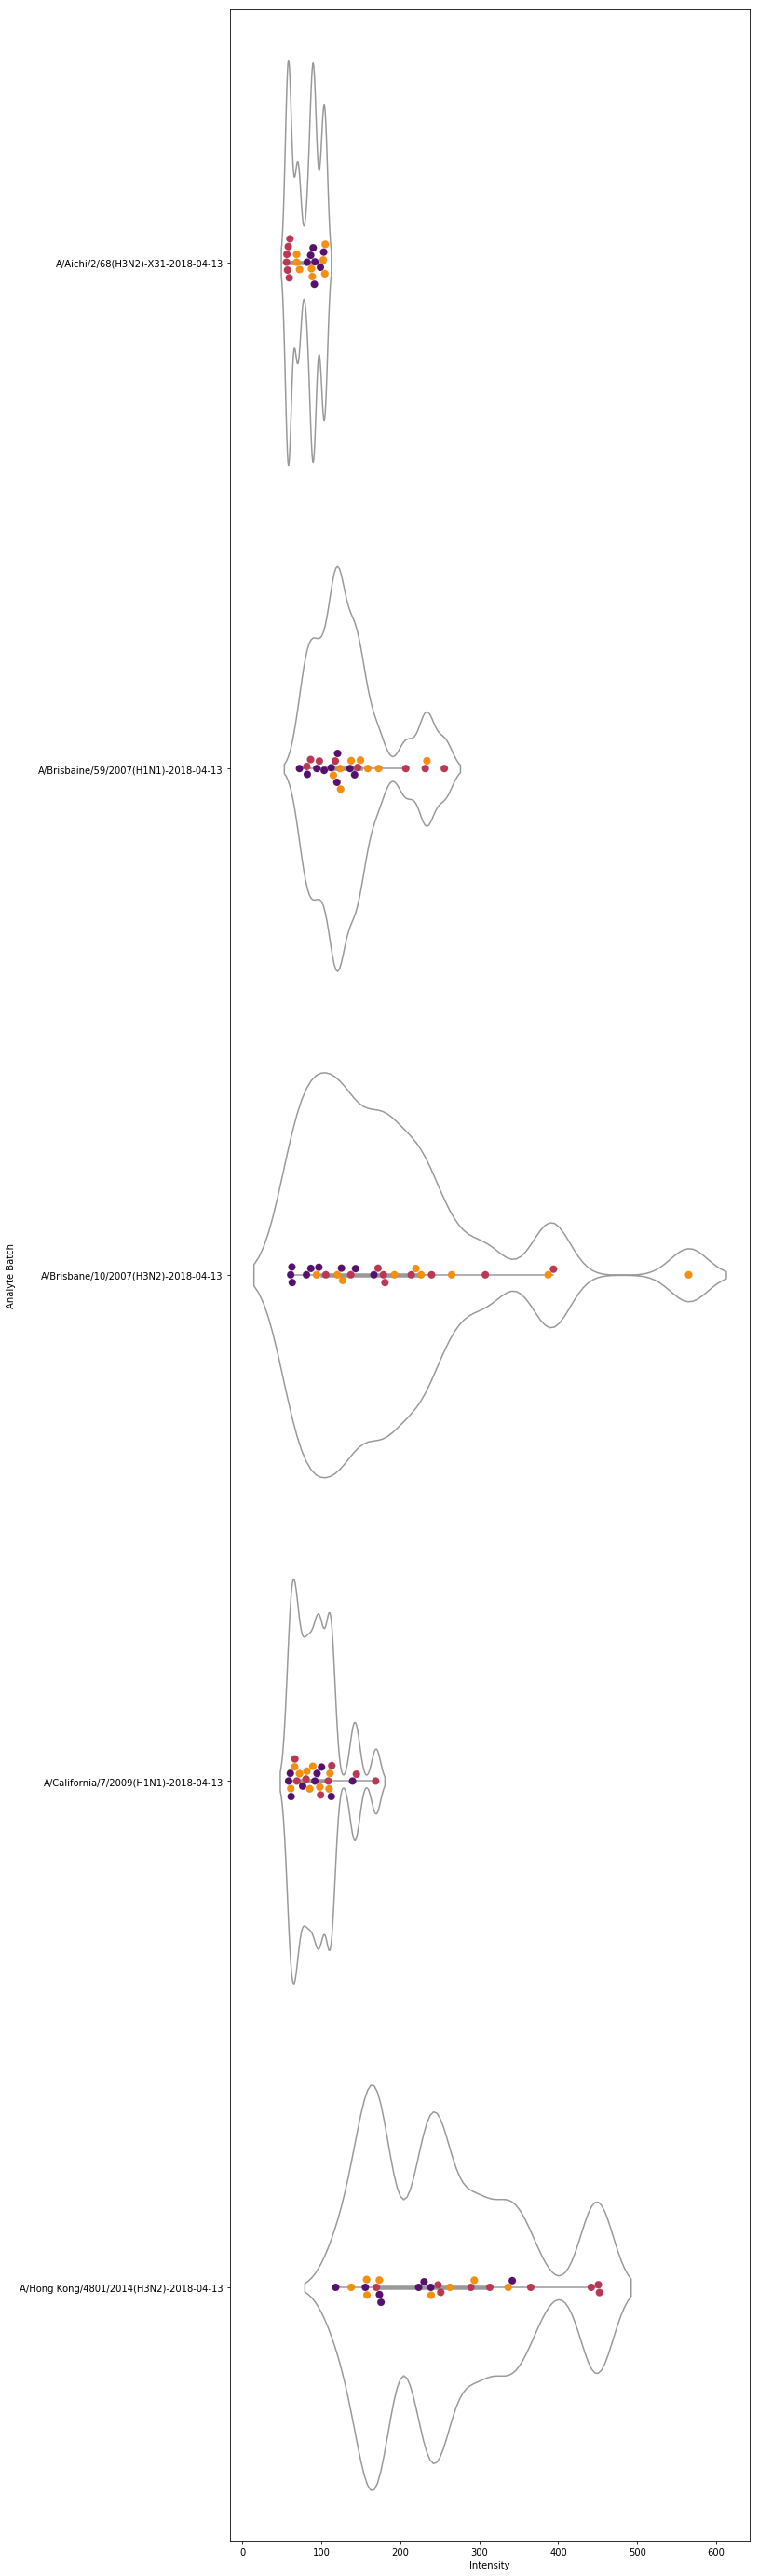

In [107]:
d = data
d = d.subset_ligand_batches(["P076"])
fig ,ax = plt.subplots(figsize=(10,50))

ax = sns.violinplot(y="Analyte Batch",
                    x="Intensity",
                    bw=.2, 
                    #hue="Collection",
                    scale="width", 
                    data=d.spots_pd.sort_values(by="Analyte Batch"),
                    #split=True,
                    color="white",

                    )
ax = sns.swarmplot(y="Analyte Batch",
                   hue="Collection", 
                   x="Intensity",
                   palette=sns.color_palette("inferno",n_colors=3),
                   #color="white",
                   data=d.spots_pd.sort_values(by="Analyte Batch"),
                   size=8,
                   #split=True,
                   edgecolor="grey",
                   linewidth=0.1,)
        
ax.legend_.remove()
plt.show()

In [108]:
d.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte Batch Concentraion,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
8586,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),96.610979,73.671662,0.000000,2018_03_21_slide_41,microarray_2018_03_21,55,9,quant1,18
8669,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),80.877486,188.020867,0.000000,2018_03_21_slide_41,microarray_2018_03_21,49,6,quant1,19
8762,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),62.911243,52.559781,0.328125,2018_03_21_slide_41,microarray_2018_03_21,43,3,quant1,20
8888,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),62.469027,33.244621,0.450000,2018_03_21_slide_41,microarray_2018_03_21,24,9,quant1,21
8991,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),143.106195,614.534148,0.450000,2018_03_21_slide_41,microarray_2018_03_21,18,6,quant1,22
9059,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),125.250597,316.783652,0.000000,2018_03_21_slide_41,microarray_2018_03_21,12,3,quant1,23
9152,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),166.345133,119.159874,0.375000,2018_03_21_slide_41,microarray_2018_03_21,5,15,quant1,24
9197,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),60.958333,20.761501,0.325000,2018_03_21_slide_41,microarray_2018_03_21,36,15,quant1,25
9290,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),86.503137,198.237571,0.395833,2018_03_21_slide_41,microarray_2018_03_21,30,12,quant1,26
3475,P076,1.0,P076,A/Brisbane/10/2007(H3N2)-2018-04-13,1.450000,A/Brisbane/10/2007(H3N2),387.265032,617.965143,0.000000,2018_03_21_slide_45,microarray_2018_03_21,49,6,quant1,0


In [109]:
peptide_c_signif = data.outlier_filtering().ligand_batch_significance()



/home/janekg89/Envs/flutype_web_analysis/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



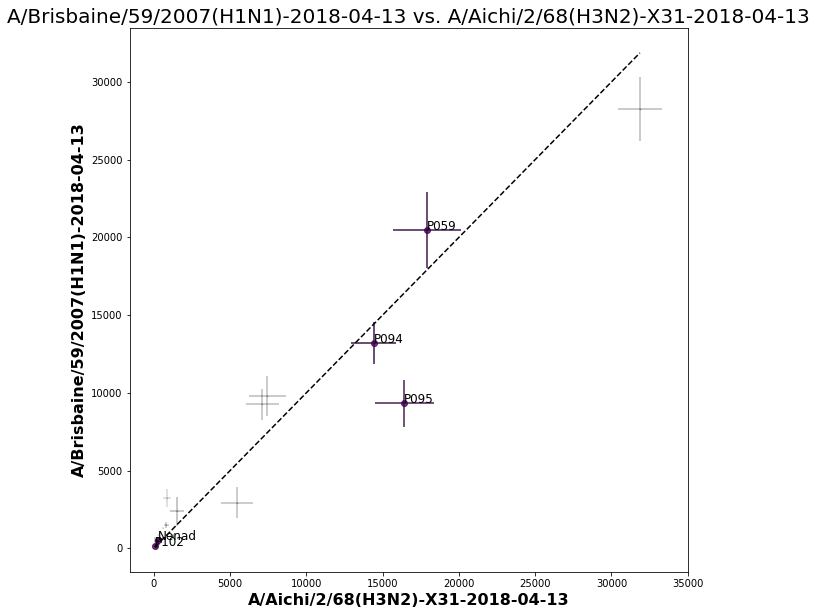

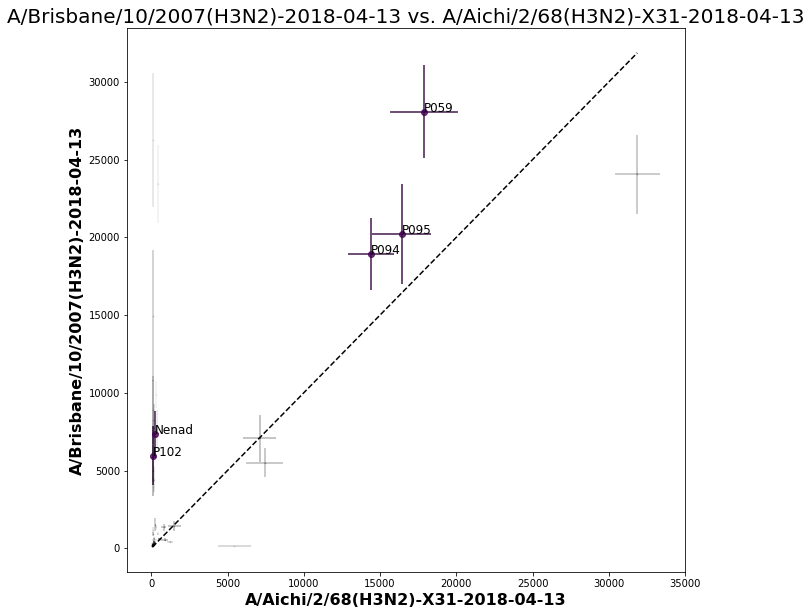

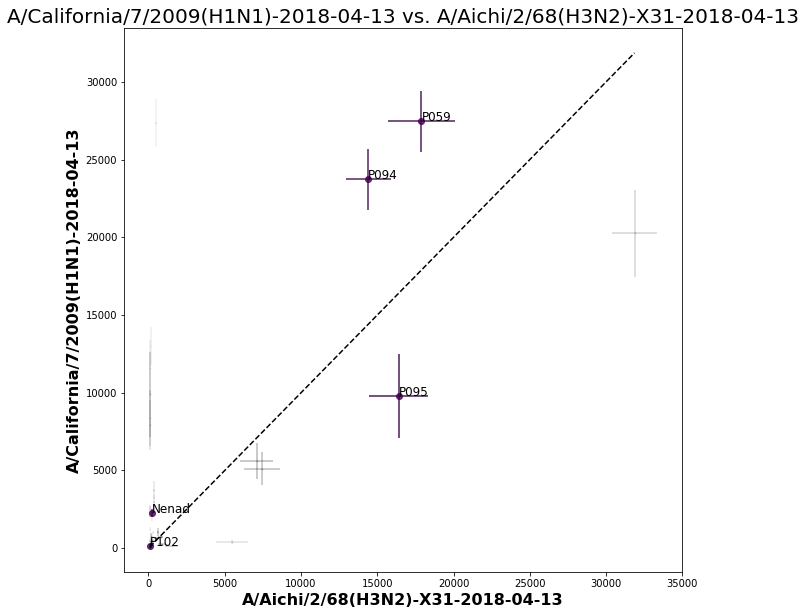

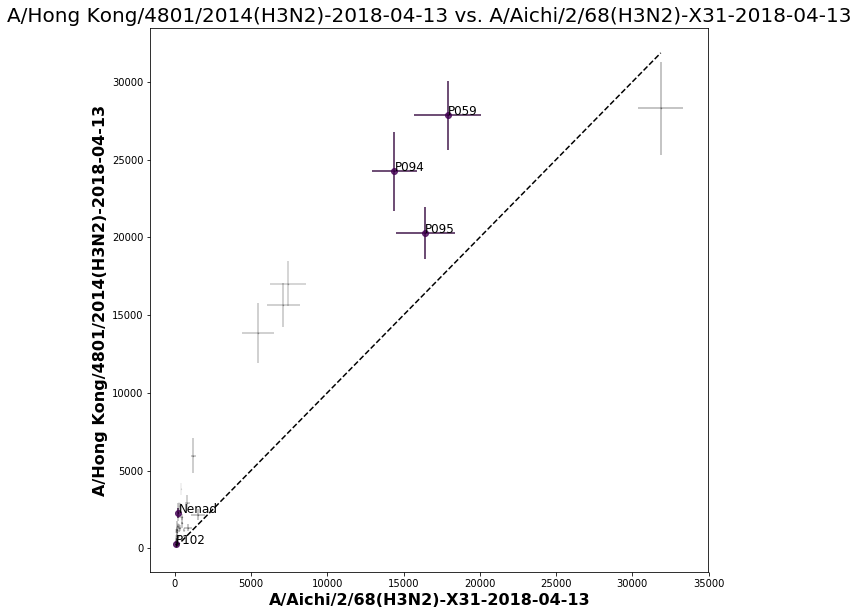

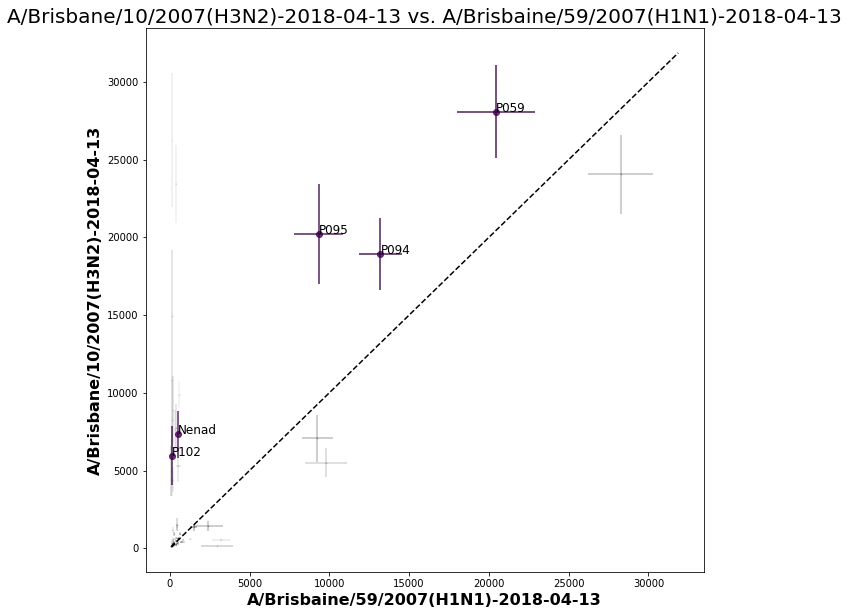

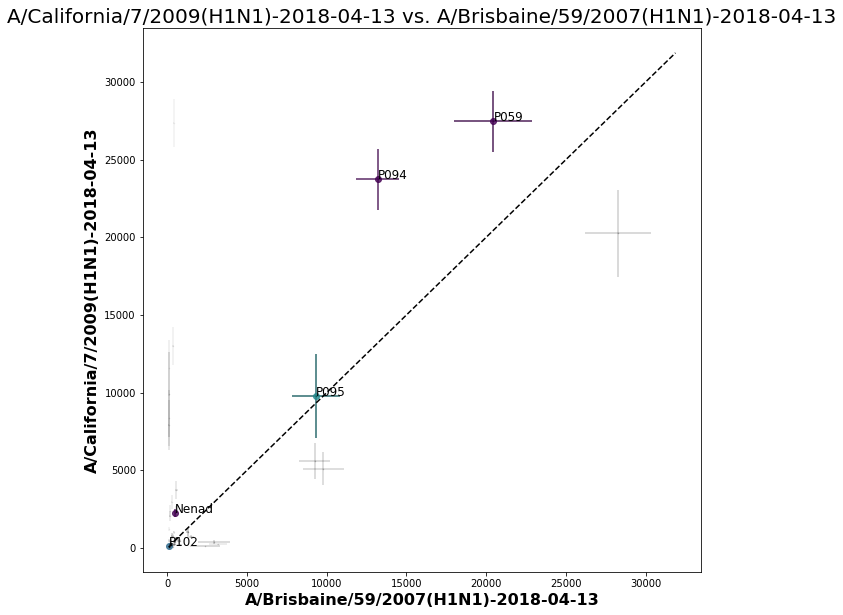

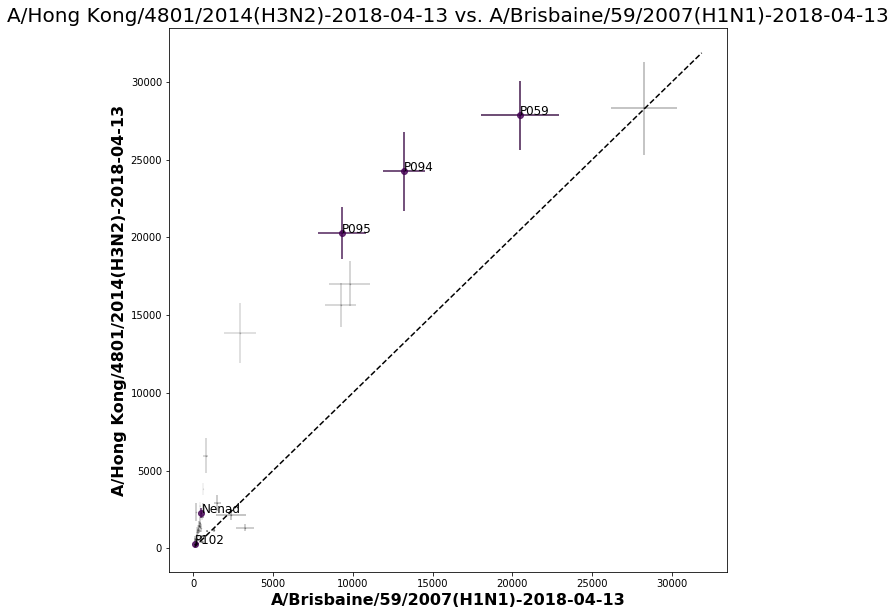

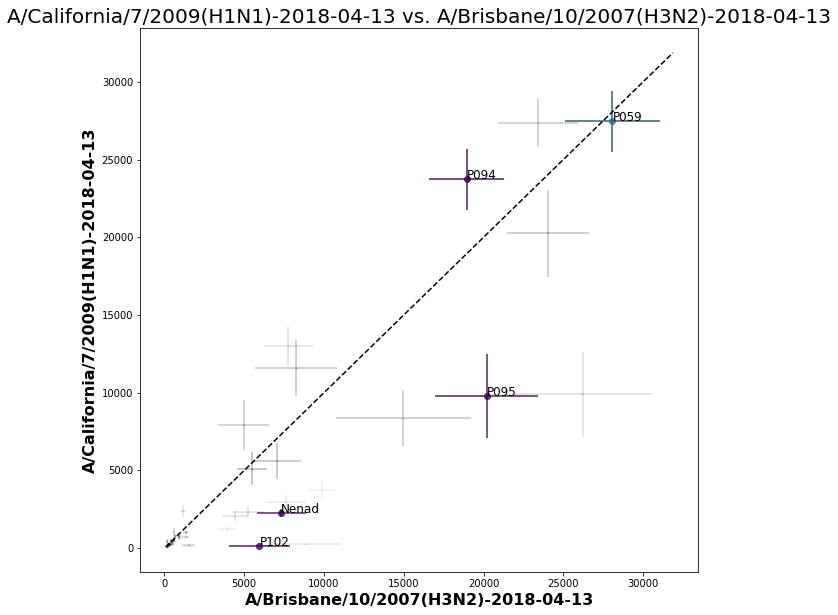

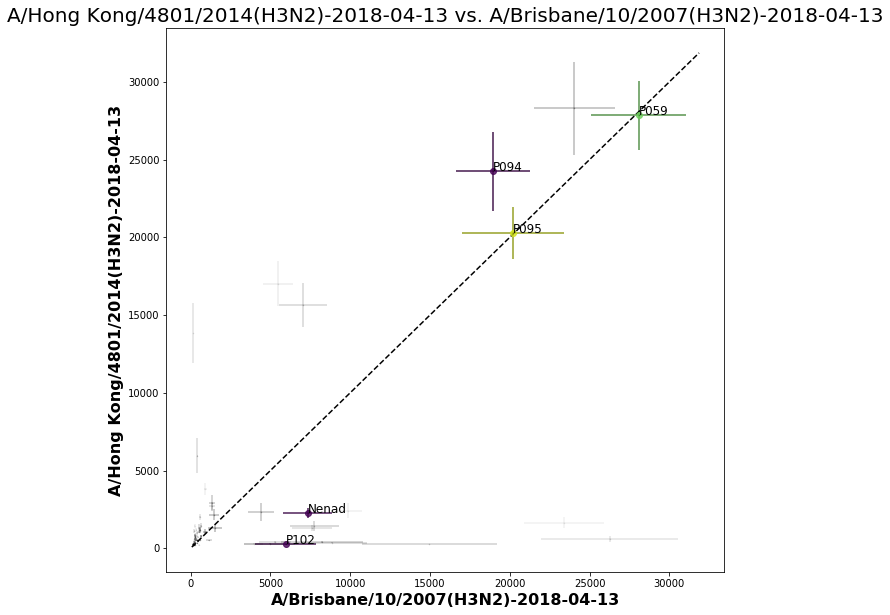

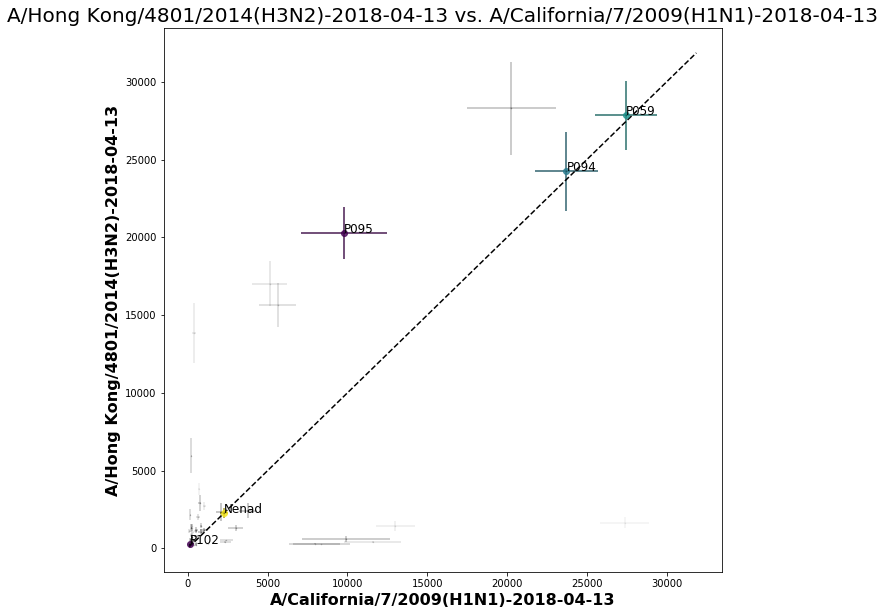

In [110]:
#fig, axes = plt.subplots(ncols=5,nrows=2, figsize = (25,10), sharey=True)

#ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    #ax = next(ax_it)
    fig, ax = plt.subplots(1,1,figsize=(10,10))

    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    #ax.set_xscale("log")
    #ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    d_selected = d.loc[d["Ligand Batch"].isin(["P095","P059","P094","Nenad","P102"])]
    #d_selected = d


    d_n = d
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    #d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    #extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")
    plt.savefig(uri_name1+uri_name2+"correlations.png", bbox_inches="tight")   
    plt.show()


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [ ]:
lb=["LF","Empty"]
spots_dj = spots_dj.exclude(raw_spot__lig_fix_batch__sid__in = lb)
data = a2.Data(spots_dj=spots_dj)


ValueError: There must be exactly two hue levels to use `split`.'

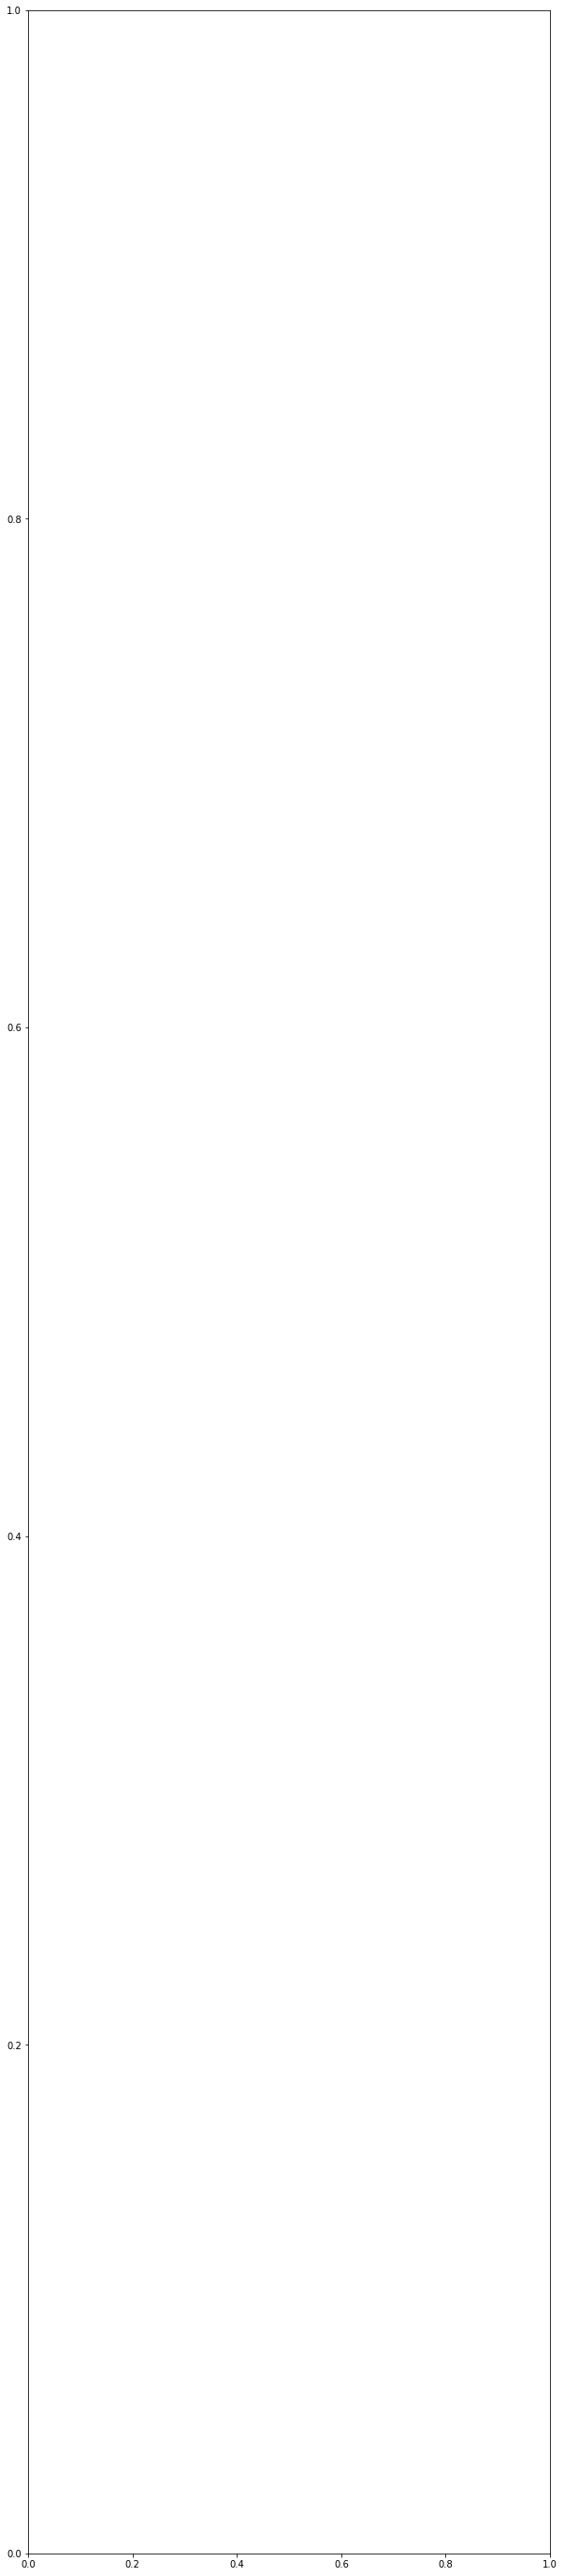

In [50]:
d = a2.Data(spots_pd=data.spots_pd[data.spots_pd["Collection Type"]=="quant1"])
fig ,ax = plt.subplots(figsize=(10,50))

ax = sns.violinplot(y="Collection",
                    x="Intensity",
                    bw=.2, 
                    hue="Ligand Batch",
                    scale="width", 
                    data=d.spots_pd.sort_values(by="Ligand Batch"),
                    split=True,)

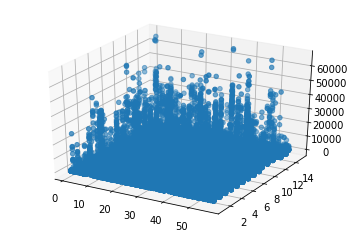

In [51]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter(xs=data.spots_pd["Row"],ys=data.spots_pd["Column"],zs =data.spots_pd["Intensity"])
#data.spots_pd.scatter(x="Row",y="Column",z ="Intensity")
plt.show()

In [52]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing


2.5.1


In [53]:
#d = a2.Data(spots_pd=data.spots_pd.dropna())
#d = data.subset_ligand(["LF"])
d = d.subset_ligand_batches(["Nenad"])
le = preprocessing.LabelEncoder()
le.fit(d.spots_pd["Ligand Batch"])
cs = le.transform(d.spots_pd["Ligand Batch"])
colors =cs.astype(float) / cs.max()


def trace(d):
    return [go.Scatter3d(
    x=d.spots_pd["Row"],
    y=d.spots_pd["Column"],
    z=d.spots_pd["Intensity"],

    mode='lines+markers',
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=1.1
    )
)]


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=trace(d.subset_collection(["2018_03_21_slide_44"])), layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in true_divide



In [73]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

In [84]:
z = d.subset_ligand_batches(["Nenad"]).spots_pd.pivot_table(columns="Column",index="Row",values="Intensity").as_matrix()

In [86]:
z

array([[14281.2703987 ,            nan,            nan,            nan,
                   nan],
       [           nan, 13853.34989984,            nan,            nan,
                   nan],
       [           nan,            nan, 35691.86545491,            nan,
                   nan],
       [           nan,            nan,            nan, 43047.27396485,
                   nan],
       [           nan,            nan,            nan,            nan,
        38832.97395856],
       [34744.17537085,            nan,            nan,            nan,
                   nan],
       [           nan, 24874.95513362,            nan,            nan,
                   nan],
       [           nan,            nan, 21458.56205507,            nan,
                   nan],
       [           nan,            nan,            nan, 19717.62582499,
                   nan]])

In [85]:

data = [
    go.Surface(
        z=z
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='elevations-3d-surface')